# IMF Loans and Asylum Rates: A Comparative and Hierarchical Approach

### By Abduelwahab Hussein

# 1. Background

## a. IMF Loans: What Are Their Stipulations?

Countries apply for and receive IMF loans in exchange for said country to promote trade liberalization, market privatization, and central government fiscal and monetary austerity. Concretely, nations accomplish these policy objectives via depreciation of overvalued currencies, promotion of exports, abolition of import quotas, reduction in discretionary government spending, increasing interest rates to elicit higher domestic savings, increasing agricultural prices to stimulate production, and abolition of price and minimum wage controls. Many of the listed policy objective can result in social unrest, acute poverty, and inability of country citizens to live with all needs met, at least in the short-term.

## b. IMF Loans and Related Social Consequences: A Primer

That IMF loans cause extensive negative social consequences to the nation adopting such policy is far from an agreed upon notion, or even a new claim. Ever since the World Bank and International Monetary Fund converged roles and began offering monetary and structural loans to impoverished nations in the 1980s, economists, most notably Cornia, Jolly, and Stewart have studied and explored the social consequences of adjustment policy. (Lensink, 1995; Cornia, Jolly, Stewart, 1987).  

To say the least, empirical evidence is ambiguous about the extent to which IMF loans affect a nation’s socioeconomic wellbeing, and academics have yet to reach a consensus for the best way to measure possible social shortcomings due to the IMF loans. Interestingly though, a large body of research indicates negative effects on a nation’s healthcare system, educational attainment, energy costs, and food prices, giving way to a call for more gradual implementation of policy and compensatory financing to deal with social consequences of IMF loans (Cornia, Jolly, Stewart, 1987; Kentikelenis, 2017). IMF loans, _in the short run_, have negative social consequences (Stroup, Zissimos, 2013). More important a question is whether SALs lead to an improvement in long-term economic growth and if this outweighs short-term human suffering attached to SAL assumption (Szirmai 2005; Harrigan, Mosley, and Toye  1991).

## c. Relevance of Our Research

Not many studies exist that examine how IMF policy and loans affects migration flows, specifically that of human capital flight and refugee, asylum, and internally displaced persons flows. Forced and unforced migration can lead to both deterioration and improvement in individual quality of life, as well as stagnation or acceleration of a nation’s economy. Hence, international and intranational immigration flows are studied extensively, as such demographic changes have widespread human, political, and economic implications.
That there is a dearth of research in this subject is surprising on at least two accounts. Firstly, as stated, researchers have analyzed almost every possible social fallout of structural adjustment, including its effects on education, healthcare, ecology, prices, political instability, social programs, and agricultural production, without much mention of immigration. Further, since the proliferation of globalization in the 2000s and the parallel increase in cross-country and intra-country immigration, both voluntary and involuntary, the determinants of immigration and subsequent socioeconomic results of immigration have been studied extensively without much regard to how IMF loans affects immigration (Samir, Ralph, & Connel 2003; Jacques, Longhi, and Nijkamp 2004).

In our research, and to fill in the literature gap, we create four different models that measure the effects of IMF loans on the percent of asylum seekers per country. We compare all four models' efficacy and conclude with policy implications.


## d. Our Research: A Deeper Look at the Data and Our Hypothesis

**1. Let us Begin With our Data and Data Sources:**

_Asylum-seekers:_ According to the UNHCR, an _Asylum-seeker_ is an individual who has formally applied for international protection and whose claim for refugee status has yet to be decided upon. Asylum-seekers are already in the country (or the country point of entry) they desire to seek asylum in, either illegally or not.  Asylum-seeker nominal values are retrieved from the UNHCR data repository, and rates per person are calculated using World Bank mid-year population estimates of origin countries.

_IMF Loans_: Our key independent variable is IMF Structural Adjustment. We retrieve the data using the IMF data repository (IMF International Financial Statistics). There are various ways to standardize IMF SAL packages to make them comparable across nations. We decide to use dummy variables to encode whether a nation has received IMF loans in a given year. A nation is encoded “$1$” if it has received an IMF SAL in the during a specific year and "$0$" otherwise.

_Other Variables_: We add to our data analysis variables that can affect _Asylum-Seeking_ within a country.

- The first variable is _Political Stability_, which is a World Bank "worldwide governance" indicator that ranges from $-2.5$ to $2.5$.

- The second variable is "Armed Conflict", which is a dummy variable that is encoded as $1$ if the country has "contested incompatibility that concerns government and/or territory, where the use of armed force between two parties, of which at least one is the government of a state, results in at least 25 battle-related deaths in a calendar year", and $0$ otherwise. This data is retrieved from the Upssala Conflict Data Program (UCDP).

- The third variable is a dummy encoded as $1$ if the country is in the Middle East and $0$ otherwise.

- The last variable is _Natural Disasters_, is the proportion of those within a country who are affected by natural disasters. Natural disasters are those that "must affect 100 or more people, be declared a state of emergency, kill 10 or more people, or be subject to international assistance". This data is from the Centre for Research on the Epidemiology of Disaster (CRED)

<br>




**2. Our Hypothesis**

It follows from national experiences that SAP implementation, at least in the short run, leads to social unrest and difficult economic situations. Thus, we hypothesize a positive relationship between IMF SAL and the proportion of asylum seekers within a country. Structural adjustment tends to lead to heightened tensions between the populace and governors because of lack of social programs, so we believe this may cause persecution and subsequent refugee, IDP, and asylum status.

# 2. Loading and Cleaning the Data

We will now look to loading the relevant data and cleaning the data to ensure consistency when sampling.

## a. Loading the Data

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import pymc3 as pm3
from theano import tensor as T
from theano.tensor.nlinalg import matrix_inverse
import matplotlib.pyplot as plt
import seaborn as sbn
import statsmodels.tsa.api as sm
import os
import theano.tensor as T
import theano as t

plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('sap_final_data.csv')

df.head()

df.dropna(axis=0, how='all',inplace=True)
df.to_csv('sap_final_data.csv', index=False)

In [ ]:
df.Country_ID.value_counts()

0      17
79     17
77     17
76     17
75     17
       ..
32     17
31     17
30     17
29     17
105    17
Name: Country_ID, Length: 106, dtype: int64

In [ ]:
df.shape

(1802, 40)

## b. ln_AsylumRate is approximatley normally distributed

Since the log of asylum rates is normally distributed, we can continue our analysis, noting that our prior on log asylum rates and the likelihood on log asylum rates will be approximately normally distributed.

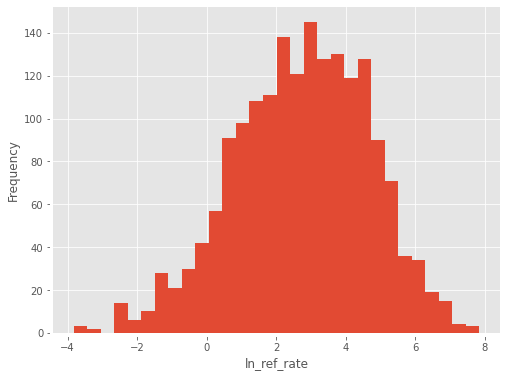

In [ ]:
plt.figure(figsize=(8,6))
df.ln_AsyRate.plot(kind='hist',bins=30)
# removing rows with zeros in RefRate
#df.drop(df.loc[df['ln_RefRate']<=0].index, inplace=True) #it's not dropping....
plt.xlabel('ln_ref_rate')
sbn.despine(offset=3.)
plt.show()



## c. Some More Cleaning

In [ ]:
# old code that messed up the data
#df.loc[df['NaturalDisasterRate'].isna()] = df['NaturalDisasterRate'].mean() #interpolating using the mean for each column
#df.loc[df['PoliticalStab'].isna()] = df['PoliticalStab'].mean()

df.loc[df['NaturalDisasterRate'].isna(),'NaturalDisasterRate'] = df['NaturalDisasterRate'].mean() #interpolating using the mean for each column
df.loc[df['PoliticalStab'].isna(), 'PoliticalStab'] = df['PoliticalStab'].mean()


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,1802.0,2010.000000,4.900339,2.002000e+03,2.006000e+03,2010.000000,2014.000000,2.018000e+03
Country_ID,1802.0,52.500000,30.606696,0.000000e+00,2.600000e+01,52.500000,79.000000,1.050000e+02
TimexIMFDummy,1802.0,0.284684,0.451389,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000e+00
Time.1,1802.0,0.612098,0.487407,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000e+00
IMFDummy,1802.0,0.284684,0.451389,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000e+00
SouthAmerica,1802.0,0.160377,0.367058,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+00
SouthAsia,1802.0,0.066038,0.248417,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+00
MiddleEast,1802.0,0.084906,0.278819,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+00
SSA,1802.0,0.396226,0.489248,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000e+00
EAP,1802.0,0.103774,0.305051,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000e+00


**Quick Note on Omitted Observations:**

We omit island countries from our analysis, as it is difficult for island-country inhabitants to seek asylum to a different country, as the island-country is landlocked.

We also omit South Sudan and Kosovo, as they do not have data for each year observed due to their relatively new status as countries.

Lastly, for countries from which there are zero asylum seekers, the log of asylum seekers is undefined, and we attribute to such countries log(.1) instead of log(0). These countries include Algeria and Eritrea.

# 2. Pooled, Unpooled, and Heirarchical Models

In the below lines of code, we run four different models. The first is a pooled OLS model. The second is an unpooled model. The third is a hierarchical model constrained to the treatment parameter, and the fourth model is a hierarchical model constrained to the intercept and treatment parameter. Following this section, we compare all four models to gauge which fits best.

For each subsection, we exhibit the code executed to implement sampling based on the type of model we choose. Next, we illustrate the summary of important statistics for each model. Lastly, we exhibit the traceplots and posterior distributions. We comment on the relevant statistics, traceplots, and distributions in the net two sections.

## a. Pooled Model

In [ ]:
with pm3.Model() as asylum_pooled_model:


    #Priors

    intercept = pm3.Normal('constant',  mu = 0, sd = 10.) # not hierarchical.
    IMF_Dummy = pm3.Normal('IMFDummy', mu = .5, sd = 10.)
    Armed_Conflict_Gov = pm3.Normal('ArmedConflictGov', mu = .5, sd = 1)
    Political_Stability = pm3.Normal('PoliticalStability', mu = 0, sd = 5)
    Natural_Disasters = pm3.Normal('NaturalDisasterPerPerson', mu = 0., sd = 10.)
    Middle_East_Dummy = pm3.Normal('MiddleEastDummy', mu = .5, sd = 10.)
    treatment = pm3.Normal('TimexIMFDummy', mu = .5, sd = 10.)
    sigma = pm3.Uniform('Sigma',lower = .1, upper = 10.)

    # equations
    mu_i_0 = intercept + IMF_Dummy * df.IMFDummy + Armed_Conflict_Gov * df.ArmedConflictGov +\
             Political_Stability * df.PoliticalStab + Natural_Disasters * df.NaturalDisasterRate +\
             treatment * df.TimexIMFDummy

     #parameters ci is indiviual sepcific constandt for each constant, and then use c_i as an independent variable and set it equal to beta* Geography

    #likelihoods
    like_0 = pm3.Normal('likelihood', mu = mu_i_0, sd = sigma, observed = df.ln_AsyRate)

In [ ]:
with asylum_pooled_model:
    #step = pm3.Metropolis()
    step = pm3.NUTS()
    samples = pm3.sample(1000, step=step, tune=500, return_inferencedata=True) #try 10000 and 1000 next?

Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Sigma, TimexIMFDummy, MiddleEastDummy, NaturalDisasterPerPerson, PoliticalStability, ArmedConflictGov, IMFDummy, constant]


Sampling 2 chains for 500 tune and 1_000 draw iterations (1_000 + 2_000 draws total) took 96 seconds.


In [ ]:
pm3.summary(samples)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
constant,2.382,0.065,2.269,2.516,0.001,0.001,2000.0,1396.0,1.0
IMFDummy,0.293,7.215,-13.509,13.327,0.243,0.174,873.0,1137.0,1.0
ArmedConflictGov,-0.305,0.132,-0.541,-0.057,0.003,0.002,1636.0,1292.0,1.0
PoliticalStability,-0.541,0.067,-0.673,-0.419,0.002,0.001,1650.0,1376.0,1.0
NaturalDisasterPerPerson,0.235,0.627,-1.012,1.358,0.016,0.013,1588.0,1153.0,1.0
MiddleEastDummy,0.679,10.380,-19.941,19.521,0.237,0.265,1915.0,1048.0,1.0
TimexIMFDummy,0.038,7.220,-12.899,13.986,0.243,0.174,876.0,1103.0,1.0
Sigma,1.890,0.032,1.831,1.953,0.001,0.001,1756.0,1088.0,1.0


Write some explanations here on HDI, mcse and stuff like that

/tmp/ipykernel_78/1751854374.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


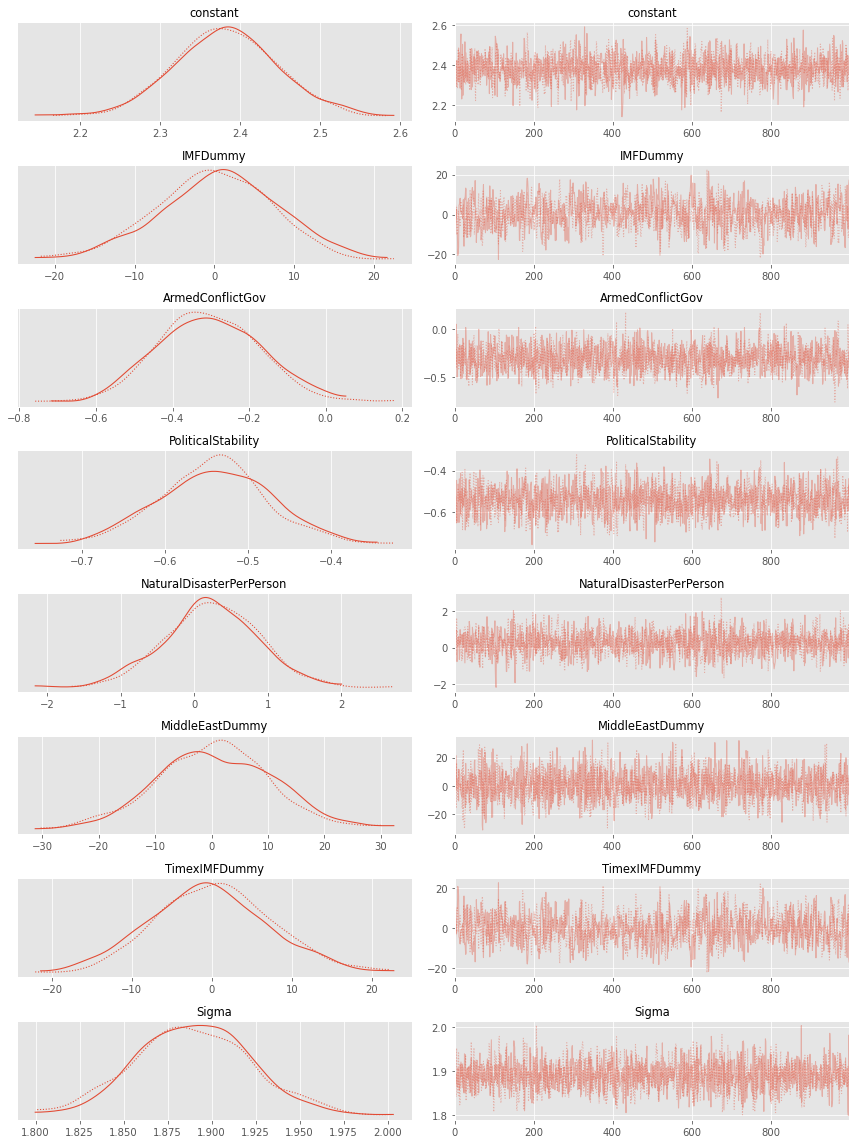

In [ ]:
pm3.plot_trace(samples, divergences=True);
plt.tight_layout()
plt.show()

## b. Unpooled Model

In [ ]:
n_country = df.Country_ID.max() + 1
n_country

106

In [ ]:
with pm3.Model() as asylum_unpooled_model:

    #Priors

    intercept = pm3.Normal('constant',  mu = 0, sd = 10., shape = n_country)
    IMF_Dummy = pm3.Normal('IMFDummy', mu = .5, sd = 10., shape = n_country)
    Armed_Conflict_Gov = pm3.Normal('ArmedConflictGov', mu = .5, sd = 1, shape = n_country)
    Political_Stability = pm3.Normal('PoliticalStability', mu = 0, sd = 5, shape = n_country)
    Natural_Disasters = pm3.Normal('NaturalDisasterPerPerson', mu = 0., sd = 10., shape = n_country)
    Middle_East_Dummy = pm3.Normal('MiddleEastDummy', mu = .5, sd = 10., shape = n_country)
    treatment = pm3.Normal('TimexIMFDummy', mu = .5, sd = 10., shape = n_country)
    sigma = pm3.Uniform('Sigma',lower = .1, upper = 10.)

    # equations
    mu_i_0 = intercept[df.Country_ID] + IMF_Dummy[df.Country_ID] * df.IMFDummy + Armed_Conflict_Gov[df.Country_ID] * df.ArmedConflictGov +\
             Political_Stability[df.Country_ID] * df.PoliticalStab + Natural_Disasters[df.Country_ID] * df.NaturalDisasterRate +\
             treatment[df.Country_ID] * df.TimexIMFDummy

     #parameters ci is indiviual sepcific constandt for each constant, and then use c_i as an independent variable and set it equal to beta* Geography

    #likelihoods
    like_0 = pm3.Normal('likelihood', mu = mu_i_0, sd = sigma, observed = df.ln_AsyRate, shape = n_country) #different likelihoods foreach country, or is it for each country-year observation?

    unpooled_trace = pm3.sample(return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Sigma, TimexIMFDummy, MiddleEastDummy, NaturalDisasterPerPerson, PoliticalStability, ArmedConflictGov, IMFDummy, constant]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 200 seconds.


/tmp/ipykernel_78/547066664.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


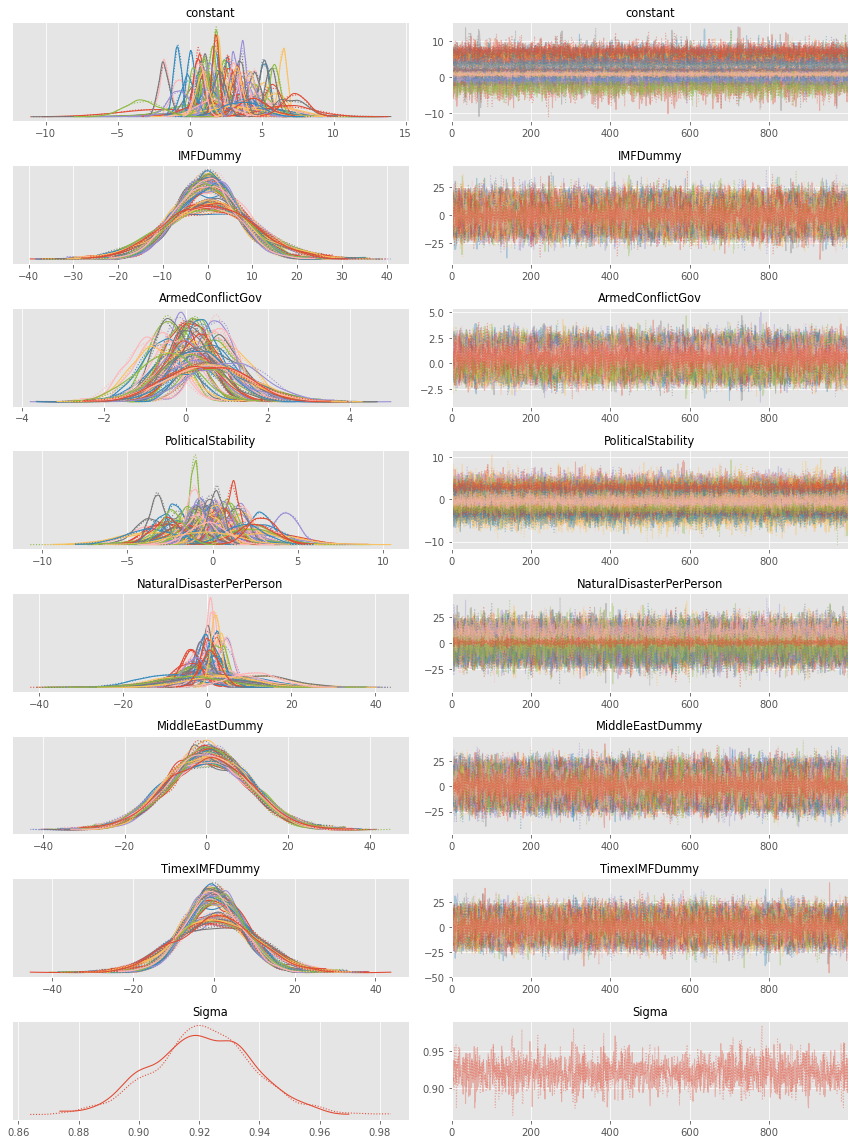

In [ ]:
pm3.plot_trace(unpooled_trace, divergences=True);
plt.tight_layout()
plt.show()

In [ ]:
pm3.summary(unpooled_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
constant[0],-2.128,2.640,-7.077,2.725,0.047,0.049,3174.0,1597.0,1.0
constant[1],5.221,0.336,4.618,5.841,0.005,0.003,5059.0,1572.0,1.0
constant[2],1.464,1.525,-1.347,4.259,0.024,0.025,4251.0,1752.0,1.0
constant[3],1.368,0.477,0.487,2.234,0.007,0.006,4068.0,1666.0,1.0
constant[4],5.100,0.569,4.042,6.149,0.009,0.006,4005.0,1654.0,1.0
...,...,...,...,...,...,...,...,...,...
TimexIMFDummy[102],0.379,9.756,-16.736,19.771,0.120,0.252,6602.0,1643.0,1.0
TimexIMFDummy[103],0.431,7.393,-12.650,14.866,0.137,0.164,2907.0,1526.0,1.0
TimexIMFDummy[104],-0.616,7.046,-13.127,12.984,0.118,0.166,3579.0,1666.0,1.0
TimexIMFDummy[105],0.531,10.287,-18.309,19.425,0.127,0.273,6602.0,1438.0,1.0


## c. Hierarchical (Partially Pooled) Model One Parameter

In [ ]:
# there are 106 different countries in your data NOT 124


#network_model = pm3.Model()

#country_idx = pm3.Data("country_idx", Country-ID, dims="Country-ID")

with pm3.Model() as asylum_hierarchical_model: #not making interecept hierarchical yet

    # hyperpriors
    mu_treatment = pm3.Normal('Treatment Mean', mu=0., sigma=2.) #hyperprior
    sigma_treatment = pm3.HalfCauchy('Treatment Sigma', beta = 1.) #hyperprior
    sigma = pm3.Uniform('Sigma',lower = .1, upper = 10.)
    # hierarchical children variables
    treatment_offset = pm3.Normal('Treatment Offset', mu=0., sd=1., shape = n_country) #helps us create the uncentered distribution so no funneling
    treatment = pm3.Deterministic('Treatment', mu_treatment + sigma_treatment * treatment_offset) #does this also need a shape parameter?

    #Priors
    intercept = pm3.Normal('constant',  mu = 0, sd = 10.) # not hierarchical.
    IMF_Dummy = pm3.Normal('IMFDummy', mu = .5, sd = 10.) # do I need this is covered by the 'treatment" parameter already
    Armed_Conflict_Gov = pm3.Normal('ArmedConflictGov', mu = .5, sd = 1)
    Political_Stability = pm3.Normal('PoliticalStability', mu = 0, sd = 5)
    Natural_Disasters = pm3.Normal('NaturalDisasterPerPerson', mu = 0., sd = 10.)
    Middle_East_Dummy = pm3.Normal('MiddleEastDummy', mu = .5, sd = 10.)




    mu_i_2 = intercept + IMF_Dummy * df.IMFDummy + Armed_Conflict_Gov * df.ArmedConflictGov +\
    Political_Stability * df.PoliticalStab + Natural_Disasters * df.NaturalDisasterRate +\
    treatment[df.Country_ID]* df.TimexIMFDummy #can I use TimexIMFDummy instead of sap.time * sap.IMFDummy. YESS

    #parameters ci is indiviual sepcific constandt for each constant, and then use c_i as an independent variable and set it equal to beta* Geography

    #likelihoods
    like_2 = pm3.Normal('likelihood', mu = mu_i_2, sd = sigma, observed = df.ln_AsyRate)

    with asylum_hierarchical_model:
        hierarchical_trace_1 = pm3.sample(2000, tune=2000, return_inferencedata=True, target_accept = .95)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [MiddleEastDummy, NaturalDisasterPerPerson, PoliticalStability, ArmedConflictGov, IMFDummy, constant, Treatment Offset, Sigma, Treatment Sigma, Treatment Mean]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 184 seconds.


/tmp/ipykernel_78/3564515899.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


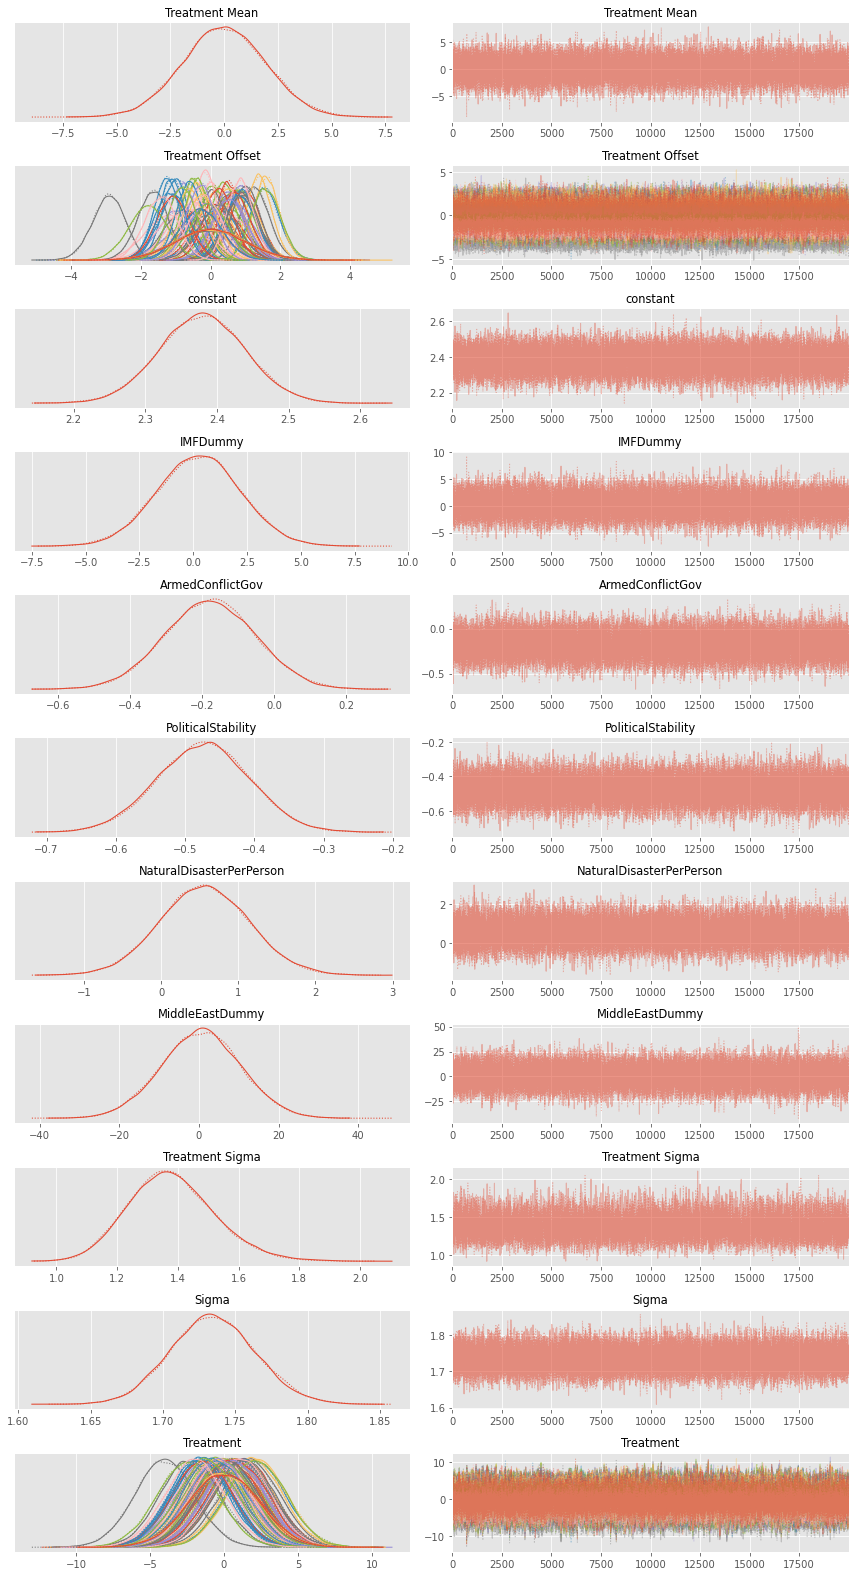

In [ ]:
pm3.plot_trace(hierarchical_trace_1, divergences=True);
plt.tight_layout()
plt.show()

In [ ]:
pm3.summary(hierarchical_trace_1)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Treatment Mean,-0.006,1.938,-3.685,3.573,0.014,0.010,19214.0,23297.0,1.0
Treatment Offset[0],1.004,0.437,0.202,1.844,0.002,0.002,34098.0,28307.0,1.0
Treatment Offset[1],1.560,0.424,0.778,2.367,0.003,0.002,26725.0,27308.0,1.0
Treatment Offset[2],-0.001,1.001,-1.848,1.906,0.005,0.005,40879.0,29914.0,1.0
Treatment Offset[3],-0.736,0.602,-1.887,0.382,0.003,0.003,33714.0,28414.0,1.0
...,...,...,...,...,...,...,...,...,...
Treatment[101],-0.001,2.375,-4.455,4.449,0.016,0.012,22778.0,24965.0,1.0
Treatment[102],-0.013,2.381,-4.525,4.407,0.016,0.011,23156.0,26052.0,1.0
Treatment[103],-1.128,2.016,-4.883,2.658,0.014,0.010,19825.0,24273.0,1.0
Treatment[104],-1.963,2.033,-5.715,1.921,0.014,0.010,20267.0,24323.0,1.0


## d. Hierarchical (Partially Pooled) Model Two Parameters

In [ ]:
# there are 106 different countries in your data NOT 124


#network_model = pm3.Model()

#country_idx = pm3.Data("country_idx", Country-ID, dims="Country-ID")

with pm3.Model() as asylum_hierarchical_model: #making interecept hierarchical

    # hyperpriors
    mu_treatment = pm3.Normal('Treatment Mean', mu=0., sigma=2.) #hyperprior
    sigma_treatment = pm3.HalfCauchy('Treatment Sigma', beta = 1.) #hyperprior
    sigma = pm3.Uniform('Sigma',lower = .1, upper = 10.)
    # hierarchical children variables
    treatment_offset = pm3.Normal('Treatment Offset', mu=0., sd=1., shape = n_country) #helps us create the uncentered distribution so no funneling
    treatment = pm3.Deterministic('Treatment', mu_treatment + sigma_treatment * treatment_offset) #does this also need a shape parameter?

    #Priors
    intercept = pm3.Normal('constant',  mu = 0, sd = 10., shape = n_country) # not hierarchical.
    IMF_Dummy = pm3.Normal('IMFDummy', mu = .5, sd = 10.) # do I need this is covered by the 'treatment" parameter already
    Armed_Conflict_Gov = pm3.Normal('ArmedConflictGov', mu = .5, sd = 1)
    Political_Stability = pm3.Normal('PoliticalStability', mu = 0, sd = 5)
    Natural_Disasters = pm3.Normal('NaturalDisasterPerPerson', mu = 0., sd = 10.)
    Middle_East_Dummy = pm3.Normal('MiddleEastDummy', mu = .5, sd = 10.)



    # equations

    #
    # You had intercept +.... but above you define intercept as a country-specific parameter, had to change it below
    #

    # check that the variable you want is Armed_Conflict_Gov because the variable you had didn't exist

    mu_i_1 = intercept[df.Country_ID] + IMF_Dummy * df.IMFDummy + Armed_Conflict_Gov * df.ArmedConflictGov +\
    Political_Stability * df.PoliticalStab + Natural_Disasters * df.NaturalDisasterRate +\
    treatment[df.Country_ID]* df.TimexIMFDummy #can I use TimexIMFDummy instead of sap.time * sap.IMFDummy. YESS

    #parameters ci is indiviual sepcific constandt for each constant, and then use c_i as an independent variable and set it equal to beta* Geography

    #likelihoods
    like_1 = pm3.Normal('likelihood', mu = mu_i_1, sd = sigma, observed = df.ln_AsyRate)

    with asylum_hierarchical_model:
        hierarchical_trace_0 = pm3.sample(2000, tune=2000, target_accept=0.95, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [MiddleEastDummy, NaturalDisasterPerPerson, PoliticalStability, ArmedConflictGov, IMFDummy, constant, Treatment Offset, Sigma, Treatment Sigma, Treatment Mean]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 363 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [ ]:
pm3.summary(hierarchical_trace_0)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Treatment Mean,-0.004,1.951,-3.704,3.627,0.011,0.015,30465.0,14833.0,1.0
Treatment Offset[0],0.247,0.801,-1.242,1.787,0.004,0.006,36108.0,15190.0,1.0
Treatment Offset[1],0.072,0.781,-1.387,1.550,0.004,0.006,35540.0,14985.0,1.0
Treatment Offset[2],-0.002,1.001,-1.963,1.840,0.004,0.009,54510.0,13499.0,1.0
Treatment Offset[3],-0.759,0.877,-2.398,0.862,0.005,0.005,29234.0,13772.0,1.0
...,...,...,...,...,...,...,...,...,...
Treatment[101],-0.004,1.989,-3.829,3.678,0.011,0.015,30472.0,14780.0,1.0
Treatment[102],-0.007,1.999,-3.650,3.855,0.011,0.015,31318.0,15301.0,1.0
Treatment[103],0.277,1.979,-3.504,3.913,0.011,0.015,30294.0,14875.0,1.0
Treatment[104],-0.231,1.978,-3.876,3.534,0.011,0.015,30155.0,14419.0,1.0


/tmp/ipykernel_78/1991508752.py:2: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


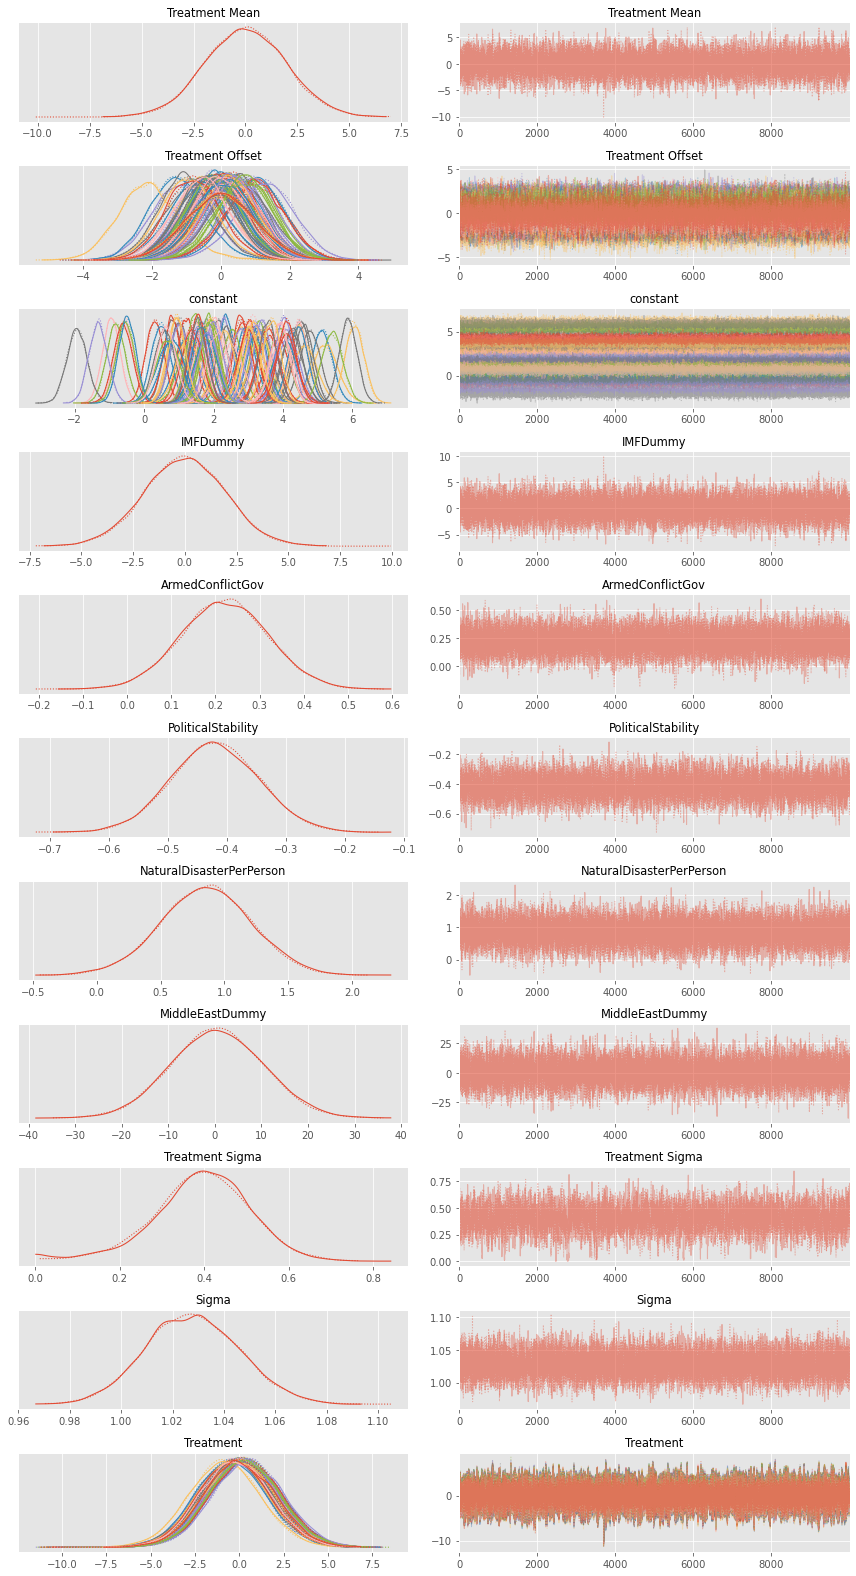

In [ ]:
pm3.plot_trace(hierarchical_trace_0, divergences=True);
plt.tight_layout()
plt.show()

# 3. Model Selection

## a. The WAIC

To gauge which model performs beter, we calculate the WAIC score below. The model with the lowest WAIC is best.

In [ ]:
pm3.compare({'Pooled': samples,'Hierarchical One Parameter': hierarchical_trace_1, 'Hierarchical Two Parameter': hierarchical_trace_0, 'Unpooled' : unpooled_trace},  ic='waic')

/opt/conda/lib/python3.9/site-packages/arviz/stats/stats.py:145: UserWarning: The default method used to estimate the weights for each model,has changed from BB-pseudo-BMA to stacking
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/arviz/stats/stats.py:1405: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/arviz/stats/stats.py:1405: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/arviz/stats/stats.py:1405: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
Unpooled,0,-2588.053457,302.350825,0.000000,8.635517e-01,57.221337,0.000000,True,log
Hierarchical Two Parameter,1,-2675.626726,131.680443,87.573269,1.036207e-01,46.115806,27.109573,True,log
Hierarchical One Parameter,2,-3563.262890,26.801340,975.209433,6.369210e-11,31.727287,53.359990,True,log
Pooled,3,-3707.426351,6.212344,1119.372894,3.282758e-02,30.088309,54.528500,False,log


## b. Intuition Behind The Superiority of the Unpooled Model and Two Parameter Hierarchical Model

We will explain the intuitive strengths and weaknesses of each model, from the pooled model to the unpooled model, below:

Let us firstly explain why a pooled model seems likely to lose the WAIC race. The pooled model does not allow for parameter heterogeneity across countries. In other words, pooled data may lead to underfitting, ie not allowing differentiation between different country groups. Case in point, We see that the intercept and slope parameters are quite heterogenous irrespective of implementing an unpooled or hierarchical model. THe uniqueness of each country's potential immigration response to IMF loans indicates that a pooled model would lead to underfitting.


We will now turn our attention to the one and two parameter hierarchical models. Intuitively, the hierarchical model constrained to the treatment and intercept seems a likely winner (irrespective of WAIC score). It stands to reason that different country "groups", such as Middle East vs Other, very low income vs low income, experiencing armed conflict vs not, etc. may affect countries' asylum rates, ie that asylum rates are dependent on categorization of country. Further, different country groups will likely have different "initial conditions" (ie intercepts) of asylum rates, similarly due to differences in the economic, social, and political atmosphere.  Thus, the hierarchical model of one parameter may not capture the hetergoeniety present in the intercept  parameter.

There is an interesting advantage of using the two parameter hierarchial model over the unpooled model. The hierarchical model allows for hyperpriors, which lets us find more similar priors (via better mean and standard deviation) for the parameters. In other words, the parent distribution allows for all observations (and particularly outliers) to be shifted closer to the hyperparameter $\mu$, thus leading to estimates with tighter credible intervals. This can be viewed when comparing the treatment posterior distributions of the unpooled and hierarchical two parameter models, where the spread for the unpooled is  generally between -20 and 20, and the spread for the hierarchical two parameter is between -10 and 10.

Lastly, we will speak on the unpooled model. In the unpooled model, each country observation receives unique parameter estimates, which seems fitting given the unique, country-specific factors that may lead to an increase in asylum-seeking. Futher, since there is enough group data to satisfy group heterogeniety, the unpooled model may be better than the hierarchical of two parameters. HoweverGiven small country "groups", unpooled estimation may lead to unreliable estimates.

In computing the WAIC, we find that the unpooled model outmuscles the hierarchical two parameter model.

# 4. Convergence of Heirarchical Model

Now that we have set the unpooled model as our preffered model, let us ensure that the model converges.

## a. Gelman-Rubin Test

The Gelman-Rubin Test is one of the most used measure for unconvering chain convergence. In this strategy, we sample from multiple chains, and we calculate both wihin and betwen chain variance.

The within chain varince shows the variation within one chain, while the between chain variance calculates the difference in means between all chains.

A Gelman-Rubin score of around $1$ implies that all chains are converging onto a stationary distribution. we calculate the Gelman-Rubin score below:

In [ ]:
pm3.summary(unpooled_trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
constant[0],-2.128,2.640,-7.077,2.725,0.047,0.049,3174.0,1597.0,1.0
constant[1],5.221,0.336,4.618,5.841,0.005,0.003,5059.0,1572.0,1.0
constant[2],1.464,1.525,-1.347,4.259,0.024,0.025,4251.0,1752.0,1.0
constant[3],1.368,0.477,0.487,2.234,0.007,0.006,4068.0,1666.0,1.0
constant[4],5.100,0.569,4.042,6.149,0.009,0.006,4005.0,1654.0,1.0
...,...,...,...,...,...,...,...,...,...
TimexIMFDummy[102],0.379,9.756,-16.736,19.771,0.120,0.252,6602.0,1643.0,1.0
TimexIMFDummy[103],0.431,7.393,-12.650,14.866,0.137,0.164,2907.0,1526.0,1.0
TimexIMFDummy[104],-0.616,7.046,-13.127,12.984,0.118,0.166,3579.0,1666.0,1.0
TimexIMFDummy[105],0.531,10.287,-18.309,19.425,0.127,0.273,6602.0,1438.0,1.0


So, we see that the Gelman-Rubin score (i.e r_hat) is very close to 1 for all parameters, which implies a low between chain variation, which also implies chain convergence.

## b. Examination of Parameter Trace Plots

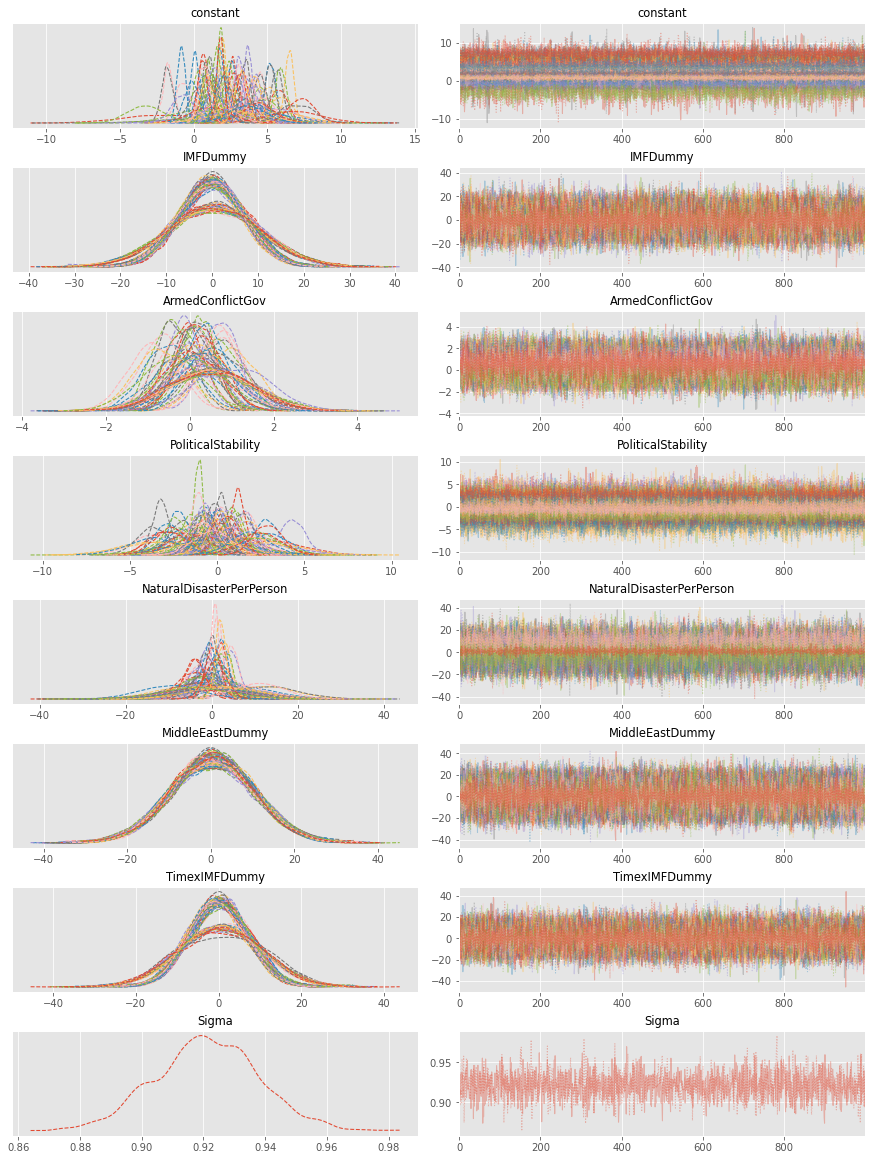

In [ ]:
pm3.plot_trace(unpooled_trace, combined=True);

The trace plots above suggest that our chain has converged to a stationary distribution. Firstly, the trace plot on the treatment parameter suggests that the mean has been consistent across iterations of chains, i.e. it does not seem that the mean is changing much across iterations and "batches" of samples. It also appears that the samplers also converged here. None of the chains appears to be divergent, because they look uncorrelated, independently random sampled.

## c. Autocorrelation

Autocorrelation can lead to poor mixing and hence divergence, so checking for autocorrelation between samples is very important. Almost all MCMC sampling methods will have autocorrelation, and below is a general measure for autocorreltion: $$\frac{N_{eff}}{N_{samples}}, $$ where $N_{eff}$ is the effective sample size, which is a measure of how (roughly) how many iid samples there are in our chain, and $N_{samples}$ is the number of samples within the chance. A value between $0.25$ and $0.4$ is considered to be a high acceptance rate. In our unpooled model, our sampling acceptance rate is between 20% and 40%.

# 4. Conclusion: Policy Significance & Credible Intervals

The WAIC score reveals that the unpooled model is most prefered. Looking at the 97% credible intervals for the treatment parameter, we see that most posteriors are centered around 0 with a wide $\pm$20 spread. This indicates that there is an ambiguous effect of IMF loans on asylum-seeking irrespective of country. Even if we presented the hierarchical two parameter model, the posteriors are still centered at $0$, but with a narrower spread. An interesting detail that perhaps "defuncts" our model is that there are many countries with armed confliict or political stability issues that, according to the unpooled model,that see decreases (or ambiguous changes) in asylum-seeking. Even when looking at other slope parameters, we see that most posteriors are centerd on $0$.

Unfortunately, the credible intervals and mean point estimates on the treatment parameters indicate a non-interesting discussion on the effect of IMF loans on asylum-seeking.



# 5. Bibliography

Cornia, G.A., R.Jolly and F.Stewart (eds.) (1987) Adjustment with a Human Face, Oxford: Clarendon.

Kentikelenik, A. (2017) Structural Adjustment and Health: a Conceptual Framework and Evidence on Pathways, Journal of Social Science & Medicine

Kentikelenis, A.E., Stubbs, T.H., King, L.P. (2016). IMF Conditionality and Development Policy Space, 1985–2014. Review of International Political Economy 23, 543–582.

Lensink, R., (1995) Structural Adjustment in Sub-Saharan Africa,    London: Longman.

Mosley, P., Harrigan and J.Toye (1991) Aid and Power: The World Bank and Policy Based Lending, vol. I, Analysis and Policy Proposals, Vol II, Case Studies, London: Routledge.


Stroup, C and Zissimos B. (2013). Social Unrest in the Wake of IMF Structural Adjustment Programs, CESifo Working Paper Series 4211, CESifo Group Munich.

Szirmai, A., (2005) The Dynamics of Socio-Economic Development, Cambridge University Press